In [1]:
%matplotlib inline

# Agrupaciones de datos

Las agrupaciones son operaciones necesarias para analizar datos, ya que permiten extraer información en función de datos categoricos de nuestro dataframe.

## Contenido

- M2_0 Introducción a la estructura DataFrame: características, carga y acceso.**
- M2_1 Creación y Almacenamiento.
- M2_2 Visualización con pandas.
- **M2_3 Otras operaciones con DataFrames: agrupaciones de datos.**
- M2_4 Gestionando datos perdidos.
- M2_5 Series temporales.

In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv("data/experiment.csv")
print(df)

   Nombre Apellidos  Altura Sexo  Nacimiento   Cof Categoria
0    Will     Smith    1.43    M  10/10/1920  0.19   laboral
1     Jon      Snow    1.98    M   10/1/1970  0.98   laboral
2    Laia   Ramirez    1.87    F  09/10/1987  0.76      cap6
3    Luzy      Raim    1.67    F  23/07/1979  0.56      cap6
4    Fein      Mang    1.78    M  12/03/1937  0.27      cap6
5  Victor     Colom    1.78    M  22/09/1957  0.97      cap8


En el siguiente ejemplo agrupamos los datos según el sexo de la persona

In [2]:
bySex = df.groupby('Sexo')
type(bySex)

pandas.core.groupby.generic.DataFrameGroupBy

Con los datos agrupados podemos realizar operaciones para obtener información de cada categoria.

In [9]:
bySex.describe()

Altura                                                     Cof          \
      count    mean       std   min     25%   50%   75%   max count    mean   
Sexo                                                                          
F       2.0  1.7700  0.141421  1.67  1.7200  1.77  1.82  1.87   2.0  0.6600   
M       4.0  1.7425  0.228674  1.43  1.6925  1.78  1.83  1.98   4.0  0.6025   

                                                
           std   min   25%   50%     75%   max  
Sexo                                            
F     0.141421  0.56  0.61  0.66  0.7100  0.76  
M     0.431383  0.19  0.25  0.62  0.9725  0.98

### Podemos obtener información concreta de cada categoria aplicando funciones agregadas a cada classe.
Agrupamos el dataframe por Categoria laboral.

Indicamos la información que queremos obtener de cada columna con un diccionario python. Especificamos la función que vamos a aplicar a los datos de cada grupo en cada columna para obtener un único valor. 

En este caso para la columna "Altura" consultamos la suma de las alturas del grupo i para "Cof" la media.


In [6]:
df.groupby(["Categoria"]).aggregate({
    "Altura":np.sum,
    "Cof":np.mean})

,Cof,Altura
Categoria,,
cap6,0.530,5.32
cap8,0.970,1.78
laboral,0.585,3.41


**Podemos aplicar un gran número de funciones de agregación:**

[Funciones estadísticas](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html): mean, std, ...

[Funciones matemáticas](https://docs.scipy.org/doc/numpy/reference/routines.math.html): sum, prod, ...

Otras funciones: max, min, ...

[Documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html)


### Agrupaciones de múltiples columnas

También se pueden haccer agrupaciones de múltiples columnas.

Se crean todas las combinaciones de las dos columnas que existen en el DataFrame.

In [7]:
gr = df.groupby(['Sexo',"Categoria"]).mean() #Otra manera de hacer agrupaciones, 
print(gr)

                Altura    Cof
Sexo Categoria               
F    cap6        1.770  0.660
M    cap6        1.780  0.270
     cap8        1.780  0.970
     laboral     1.705  0.585


In [8]:
gr = df.groupby(['Sexo',"Categoria"]).size() #Otra manera de hacer agrupaciones, 
print(gr)

Sexo  Categoria
F     cap6         2
M     cap6         1
      cap8         1
      laboral      2
dtype: int64


## ¿Cómo accedemos a los datos de un grupo concreto?

Alomejor lo que perseguimos és obtener los datos de una sola categoria. Para obtener-los se puede hacer de la siguiente manera:

In [9]:
for name, group in df.groupby('Categoria'): 
    # Imprime el nombre
    print(name)
    # Imprime el grupo
    print(group)
    
    print("_"*60)

cap6
  Nombre Apellidos  Altura Sexo  Nacimiento   Cof Categoria
2   Laia   Ramirez    1.87    F  09/10/1987  0.76      cap6
3   Luzy      Raim    1.67    F  23/07/1979  0.56      cap6
4   Fein      Mang    1.78    M  12/03/1937  0.27      cap6
____________________________________________________________
cap8
   Nombre Apellidos  Altura Sexo  Nacimiento   Cof Categoria
5  Victor     Colom    1.78    M  22/09/1957  0.97      cap8
____________________________________________________________
laboral
  Nombre Apellidos  Altura Sexo  Nacimiento   Cof Categoria
0   Will     Smith    1.43    M  10/10/1920  0.19   laboral
1    Jon      Snow    1.98    M   10/1/1970  0.98   laboral
____________________________________________________________


Así pues, para consultar los datos de un único grupo se puede hacer así:

In [10]:
df.groupby('Categoria').get_group("cap6")

,Nombre,Apellidos,Altura,Sexo,Nacimiento,Cof,Categoria
2,Laia,Ramirez,1.87,F,09/10/1987,0.76,cap6
3,Luzy,Raim,1.67,F,23/07/1979,0.56,cap6
4,Fein,Mang,1.78,M,12/03/1937,0.27,cap6


### Plots de grupos

Finalmente, los grupos también són muy útiles para visualizar información:

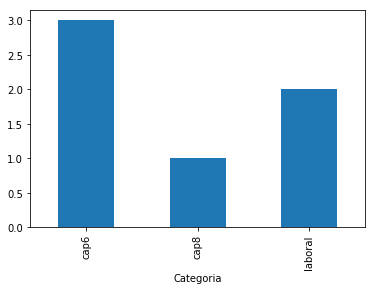

In [11]:
df.groupby('Categoria').size().plot(kind='bar')

# Ejercicios

**1) Usando el fichero WHO.csv, ¿Cuál es el volumen total de CO2 emitido por cada continente?**

**2) ¿Cuál es el número de paises por continente?**

**3) Carga el fichero climaMallorca.csv: ¿Cual es la temperatura máxima cuando el viento es inferior a 10? ¿Cuántas muestras hay?**

**4) ¿Cual es la temperatura máxima cuando el viento es superior a 10 y inferior a 20? ¿Cuántas muestras hay?**

**5) Del conjunto "who.csv" selecciona al azar: 30 paises y calcula la media de "Net primary school enrolment ratio female (%)" agrupado por Continente**

Nota: la selección de 30 paises se puede hacer con una función del objeto DataFrame

**6) Repite la anterior actividad pero ahora con todos los paises. ¿Sale la misma media?**

**7) Repasemos: Guarda el fichero WHO.csv en un fichero HDF5**